In [18]:
# Dataset : http://cb.lk/covid_19

# !wget http://cb.lk/covid_19


In [19]:
# !unzip covid_19

In [20]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [22]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [24]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [26]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [27]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [28]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 108s 14s/step - loss: 1.1971 - accuracy: 0.4922 - val_loss: 0.6818 - val_accuracy: 0.6833
Epoch 2/10
8/8 [==============================] - 119s 15s/step - loss: 0.5894 - accuracy: 0.7109 - val_loss: 0.5028 - val_accuracy: 0.8667
Epoch 3/10
8/8 [==============================] - 94s 12s/step - loss: 0.3569 - accuracy: 0.8398 - val_loss: 0.2609 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 88s 11s/step - loss: 0.3150 - accuracy: 0.8672 - val_loss: 0.2385 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 104s 13s/step - loss: 0.2644 - accuracy: 0.8984 - val_loss: 0.1090 - val_accuracy: 0.9333
Epoch 6/10
8/8 [==============================] - 88s 11s/step - loss: 0.1460 - accuracy: 0.9453 - val_loss: 0.1139 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 88s 11s/step - loss: 0.1744 - accuracy: 0.9531 - val_loss: 0.0979 - val_accuracy: 0.9833
Epoch 8/10
8/8 [========

In [29]:
# Class Activation Maps
# Grad-CAM 

In [30]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss= hist.history['val_loss']


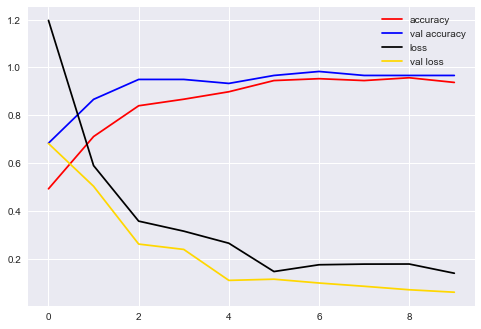

In [31]:
plt.style.use('seaborn')
plt.plot(acc,label="accuracy",color='red')
plt.plot(val_acc,label="val accuracy",color='blue')
plt.plot(loss,label='loss',color='black')
plt.plot(val_loss,label='val loss',color='gold')
plt.legend()
plt.show()